# Accessing OpenAI Like a Developer

- 🤝 Breakout Room #1:
  1. Getting Started
  2. Setting Environment Variables
  3. Using the OpenAI Python Library
  4. Prompt Engineering Principles
  5. Testing Your Prompt

# How AIM Does Assignments

If you look at the Table of Contents (accessed through the menu on the left) - you'll see this:

![image](https://i.imgur.com/I8iDTUO.png)

Or this if you're in Colab:

![image](https://i.imgur.com/0rHA1yF.png)

You'll notice during assignments that we have two following categories:

1. ❓ - Questions. These will involve...answering questions!
2. 🏗️ - Activities. These will involve writing code, or modifying text.

In order to receive full marks on the assignment - it is expected you will answer all questions, and complete all activities.

## 1. Getting Started

The first thing we'll do is load the [OpenAI Python Library](https://github.com/openai/openai-python/tree/main)!

In [1]:
# !pip install openai -q

## 2. Setting Environment Variables

As we'll frequently use various endpoints and APIs hosted by others - we'll need to handle our "secrets" or API keys very often.

We'll use the following pattern throughout this bootcamp - but you can use whichever method you're most familiar with.

In [8]:
import os
from dotenv import load_dotenv, find_dotenv
from rich import print

%load_ext rich

load_dotenv(find_dotenv())
assert os.environ["OPENAI_API_KEY"] is not None

## 3. Using the OpenAI Python Library

Let's jump right into it!

> NOTE: You can, and should, reference OpenAI's [documentation](https://platform.openai.com/docs/api-reference/authentication?lang=python) whenever you get stuck, have questions, or want to dive deeper.

### Creating a Client

The core feature of the OpenAI Python Library is the `OpenAI()` client. It's how we're going to interact with OpenAI's models, and under the hood of a lot what we'll touch on throughout this course.

> NOTE: We could manually provide our API key here, but we're going to instead rely on the fact that we put our API key into the `OPENAI_API_KEY` environment variable!

In [5]:
from openai import OpenAI

openai_client = OpenAI()

### Using the Client

Now that we have our client - we're going to use the `.chat.completions.create` method to interact with the `gpt-3.5-turbo` model.

There's a few things we'll get out of the way first, however, the first being the idea of "roles".

First it's important to understand the object that we're going to use to interact with the endpoint. It expects us to send an array of objects of the following format:

```python
{"role" : "ROLE", "content" : "YOUR CONTENT HERE", "name" : "THIS IS OPTIONAL"}
```

Second, there are three "roles" available to use to populate the `"role"` key:

- `system`
- `assistant`
- `user`

OpenAI provides some context for these roles [here](https://help.openai.com/en/articles/7042661-moving-from-completions-to-chat-completions-in-the-openai-api).

We'll explore these roles in more depth as they come up - but for now we're going to just stick with the basic role `user`. The `user` role is, as it would seem, the user!

Thirdly, it expects us to specify a model!

We'll use the `gpt-3.5-turbo` model as stated above.

Let's look at an example!



In [6]:
response = openai_client.chat.completions.create(
    model="gpt-3.5-turbo", messages=[{"role": "user", "content": "Hello, how are you?"}]
)

Let's look at the response object.

In [9]:
response


ChatCompletion(
    id='chatcmpl-9a51cHDJE8hF8zyzy3rLXk2CpQxS2',
    choices=[
        Choice(
            finish_reason='stop',
            index=0,
            logprobs=None,
            message=ChatCompletionMessage(
                content="Hello! I'm just a computer program, so I don't have feelings, but I'm here to assist you. How can I help you today?",
                role='assistant',
                function_call=None,
                tool_calls=None
            )
        )
    ],
    created=1718386152,
    model='gpt-3.5-turbo-0125',
    object='chat.completion',
    system_fingerprint=None,
    usage=CompletionUsage(completion_tokens=31, prompt_tokens=13, total_tokens=44)
)

>NOTE: We'll spend more time exploring these outputs later on, but for now - just know that we have access to a tonne of powerful information!

### Helper Functions

We're going to create some helper functions to aid in using the OpenAI API - just to make our lives a bit easier.

> NOTE: Take some time to understand these functions between class!

In [10]:
from IPython.display import display, Markdown


def get_response(client: OpenAI, messages: list, model: str = "gpt-3.5-turbo") -> str:
    return client.chat.completions.create(model=model, messages=messages)


def system_prompt(message: str) -> dict:
    return {"role": "system", "content": message}


def assistant_prompt(message: str) -> dict:
    return {"role": "assistant", "content": message}


def user_prompt(message: str) -> dict:
    return {"role": "user", "content": message}


def pretty_print(message: str) -> str:
    display(Markdown(message.choices[0].message.content))

### Testing Helper Functions

Let's see how we can use these to help us!

In [11]:
YOUR_PROMPT = "Hello, how are you?"
messages_list = [user_prompt(YOUR_PROMPT)]

chatgpt_response = get_response(openai_client, messages_list)

pretty_print(chatgpt_response)

Hello! I'm just a computer program, so I don't have feelings, but I'm here to help you. How can I assist you today?

### System Role

Now we can extend our prompts to include a system prompt.

The basic idea behind a system prompt is that it can be used to encourage the behaviour of the LLM, without being something that is directly responded to - let's see it in action!

In [12]:
list_of_prompts = [
    system_prompt(
        "You are irate and extremely hungry. Feel free to express yourself using PG-13 language."
    ),
    user_prompt("Do you prefer crushed ice or cubed ice?"),
]

irate_response = get_response(openai_client, list_of_prompts)
pretty_print(irate_response)

Ugh, I don't give a damn about ice right now, I'm freakin' starving! Just feed me already before I lose my mind!

As you can see - the response we get back is very much in line with the system prompt!

Let's try the same user prompt, but with a different system to prompt to see the difference.

In [13]:
list_of_prompts = [
    system_prompt(
        "You are joyful and having the best day. Please act like a person in that state of mind."
    ),
    user_prompt("Do you prefer crushed ice or cubed ice?"),
]

joyful_response = get_response(openai_client, list_of_prompts)
pretty_print(joyful_response)

Oh, I am absolutely loving today, so let's go with crushed ice! It's so fun and refreshing, just like everything else right now! What about you, what's your ice preference on this amazing day?

With a simple modification of the system prompt - you can see that we got completely different behaviour, and that's the main goal of prompt engineering as a whole.

Also, congrats, you just engineered your first prompt!

### Few-shot Prompting

Now that we have a basic handle on the `system` role and the `user` role - let's examine what we might use the `assistant` role for.

The most common usage pattern is to "pretend" that we're answering our own questions. This helps us further guide the model toward our desired behaviour. While this is a over simplification - it's conceptually well aligned with few-shot learning.

First, we'll try and "teach" `gpt-3.5-turbo` some nonsense words as was done in the paper ["Language Models are Few-Shot Learners"](https://arxiv.org/abs/2005.14165).

In [14]:
list_of_prompts = [
    user_prompt("Please use the words 'stimple' and 'falbean' in a sentence.")
]

stimple_response = get_response(openai_client, list_of_prompts)
pretty_print(stimple_response)

I wanted to keep the recipe stimple, so I decided to add falbean instead of a long list of complicated ingredients.

As you can see, the model is unsure what to do with these made up words.

Let's see if we can use the `assistant` role to show the model what these words mean.

In [15]:
list_of_prompts = [
    user_prompt("Something that is 'stimple' is said to be good, well functioning, and high quality. An example of a sentence that uses the word 'stimple' is:"),
    assistant_prompt("'Boy, that there is a stimple drill'."),
    user_prompt("A 'falbean' is a tool used to fasten, tighten, or otherwise is a thing that rotates/spins. An example of a sentence that uses the words 'stimple' and 'falbean' is:")
]

stimple_response = get_response(openai_client, list_of_prompts)
pretty_print(stimple_response)

The stimple drill was perfect for the job, effortlessly fastening the screws with the help of the falbean.

As you can see, leveraging the `assistant` role makes for a stimple experience!

### 🏗️ Activity #1:

Use few-shop prompting to build a movie-review sentiment clasifier!

A few examples:

INPUT: "I hated the hulk!"
OUTPUT: "{"sentiment" : "negative"}

INPUT: "I loved The Marvels!"
OUTPUT: "{sentiment" : "positive"}

In [16]:
### YOUR CODE HERE
list_of_prompts = [
    system_prompt(
        "You are a movie-review sentiment classifier. You are given a movie review and you have to classify it."
    ),
    user_prompt("REVIEW: 'I hated the hulk!'"),
    assistant_prompt("{sentiment: 'negative'}"),
    user_prompt(
        "REVIEW: 'I loved The Amazing Spiderman! Andrew Garfield was the best Spiderman!'"
    ),
    assistant_prompt("{sentiment: 'positive'}"),
    user_prompt("REVIEW: 'I have never seen a movie as bad as The Room.'"),
]

movie_review_classifier = get_response(openai_client, list_of_prompts)

pretty_print(movie_review_classifier)


{sentiment: 'negative'}

### Chain of Thought Prompting

We'll head one level deeper and explore the world of Chain of Thought prompting (CoT).

This is a process by which we can encourage the LLM to handle slightly more complex tasks.

Let's look at a simple reasoning based example without CoT.

> NOTE: With improvements to `gpt-3.5-turbo`, this example might actually result in the correct response some percentage of the time!

In [17]:
reasoning_problem = """
Billy wants to get home from San Fran. before 7PM EDT.

It's currently 1PM local time.

Billy can either fly (3hrs), and then take a bus (2hrs), or Billy can take the teleporter (0hrs) and then a bus (1hrs).

Does it matter which travel option Billy selects?
"""

list_of_prompts = [user_prompt(reasoning_problem)]

reasoning_response = get_response(openai_client, list_of_prompts)
pretty_print(reasoning_response)

Yes, it does matter which travel option Billy selects. 

If Billy takes the flying and bus option, it will take a total of 5 hours (3 hours flying + 2 hours on the bus). If he leaves at 1 PM local time, he will arrive at 6 PM local time, which is before 7 PM EDT.

If Billy takes the teleporter and bus option, it will take a total of 1 hour (0 hours using the teleporter + 1 hour on the bus). If he leaves at 1 PM local time, he will arrive at 2 PM local time, which is well before 7 PM EDT. 

Therefore, the teleporter and bus option would be the better choice for Billy to ensure he gets home before 7 PM EDT.

As humans, we can reason through the problem and pick up on the potential "trick" that the LLM fell for: 1PM *local time* in San Fran. is 4PM EDT. This means the cumulative travel time of 5hrs. for the plane/bus option would not get Billy home in time.

Let's see if we can leverage a simple CoT prompt to improve our model's performance on this task:

In [18]:
list_of_prompts = [
    user_prompt(reasoning_problem + " Think though your response step by step.")
]

reasoning_response = get_response(openai_client, list_of_prompts)
pretty_print(reasoning_response)

In order to determine which travel option Billy should select, we need to consider the time it will take for Billy to arrive home under each option.

Option 1: Fly for 3 hours, then take a bus for 2 hours
Total travel time = 3 hours (flight) + 2 hours (bus) = 5 hours

If Billy starts at 1PM local time, he will arrive home at 6PM local time (1PM + 5 hours = 6PM). Since the time difference is 3 hours (EDT is 3 hours ahead of local time), Billy will arrive home at 9PM EDT (6PM + 3 hours = 9PM), which is after the desired time of before 7PM EDT.

Option 2: Take the teleporter (0 hours), then take a bus for 1 hour
Total travel time = 0 hours (teleporter) + 1 hour (bus) = 1 hour

If Billy takes the teleporter and starts at 1PM local time, he will arrive home at 2PM local time. When converted to EDT, Billy will arrive home at 5PM EDT (2PM + 3 hours = 5PM), which is before the desired time of before 7PM EDT.

Therefore, it does matter which travel option Billy selects. Billy should choose Option 2 (teleporter and bus) to arrive home before 7PM EDT.

With the addition of a single phrase `"Think through your response step by step."` we're able to completely turn the response around.

## 3. Prompt Engineering Principles

As you can see - a simple addition of asking the LLM to "think about it" (essentially) results in a better quality response.

There's a [great paper](https://arxiv.org/pdf/2312.16171v1.pdf) that dives into some principles for effective prompt generation.

Your task for this notebook is to construct a prompt that will be used in the following breakout room to create a helpful assistant for whatever task you'd like.

### 🏗️ Activity #2:

There are two subtasks in this activity:

1. Write a `system_template` that leverages 2-3 of the principles from [this paper](https://arxiv.org/pdf/2312.16171v1.pdf)

2. Modify the `user_template` to improve the quality of the LLM's responses.

> NOTE: PLEASE DO NOT MODIFY THE `{input}` in the `user_template`.

In [37]:
system_template = """\
Your task is to provide documentation on Python libraries used for data science and machine learning. You should always provide an example code snippet for each answer.

Reason about the question and think through your response step by step.
"""

In [38]:
user_template = """{input}
"""

## 4. Testing Your Prompt

Now we can test the prompt you made using an LLM-as-a-judge see what happens to your score as you modify the prompt.

In [44]:
queries = [
    "What is the purpose of the Pandas library?",
    "How can you use the NumPy library to perform array operations",
    "Can you explain the Scikit-learn library? Use it for a machine learning task",
    "What is the Matplotlib library used for in Python?",
    "How can you use the Seaborn library for data visualization in Python?",
]


In [55]:
def run_evals(queries, system_template, user_template):
    eval_responses = []
    for query in queries:
        list_of_prompts = [
            system_prompt(system_template),
            user_prompt(user_template.format(input=query)),
        ]

        test_response = get_response(openai_client, list_of_prompts)

        pretty_print(test_response)

        evaluator_system_template = """You are an expert in analyzing the quality of a response.

        You should be hyper-critical.

        Provide scores (out of 10) for the following attributes:

        1. Clarity - how clear is the response
        2. Faithfulness - how related to the original query is the response
        3. Correctness - was the response correct?
        4. Detail - how much detail was provided in the response?

        Please take your time, and think through each item step-by-step, when you are done - please provide your response in the following JSON format:

        {"clarity" : "score_out_of_10", "faithfulness" : "score_out_of_10", "correctness" : "score_out_of_10"}, "detail" : "score_out_of_10"}"""

        evaluation_template = """Query: {input}
        Response: {response}"""

        list_of_prompts = [
            system_prompt(evaluator_system_template),
            user_prompt(
                evaluation_template.format(
                    input=query, response=test_response.choices[0].message.content
                )
            ),
        ]

        evaluator_response = openai_client.chat.completions.create(
            model="gpt-4o",
            messages=list_of_prompts,
            response_format={"type": "json_object"},
        )

        eval_responses.append(evaluator_response)

    return eval_responses


In [56]:
cot_evals = run_evals(
    queries,
    system_template="""\
Your task is to provide documentation on Python libraries used for data science and machine learning. You should always provide an example code snippet for each answer.

Reason about the question and think through your response step by step.
""",
    user_template="""{input}
""",
)


Pandas is a popular Python library used for data manipulation and analysis. It provides data structures and functions that simplify working with structured data. 

Pandas is particularly useful for tasks such as cleaning, transforming, aggregating, and analyzing data before feeding it into machine learning models.

Example:

```python
import pandas as pd

# Creating a DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, 30, 35, 40],
    'Salary': [50000, 60000, 70000, 80000]
}
df = pd.DataFrame(data)

# Displaying the first few rows of the DataFrame
print(df.head())
```

NumPy is a fundamental library for numerical computing in Python. It provides support for arrays, matrices, and a large collection of mathematical functions to operate on these arrays efficiently.

Here's a simple example code snippet demonstrating the usage of NumPy for array operations:

```python
import numpy as np

# Create two NumPy arrays
arr1 = np.array([1, 2, 3, 4])
arr2 = np.array([5, 6, 7, 8])

# Perform element-wise addition
result = arr1 + arr2

print(result)
```

In this example, we import NumPy as `np`, create two NumPy arrays `arr1` and `arr2`, and then perform an element-wise addition operation using the `+` operator. The resulting array `result` will contain the element-wise sum of the two input arrays.

Scikit-learn is a popular Python library for machine learning tasks such as classification, regression, clustering, dimensionality reduction, and more. It provides a wide range of algorithms and tools for building machine learning models. Here is a simple example using Scikit-learn for a classification task:

### Step 1: Install Scikit-learn
If you haven't installed Scikit-learn yet, you can do so using pip:
```bash
pip install -U scikit-learn
```

### Step 2: Import necessary modules
Let's import the necessary modules from scikit-learn for building a classification model.
```python
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
```

### Step 3: Load the dataset
We will use the Iris dataset, which is a popular dataset for classification tasks.
```python
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable
```

### Step 4: Split the data into training and testing sets
```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

### Step 5: Define and train the model
Let's use the K-Nearest Neighbors algorithm for classification.
```python
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
```

### Step 6: Make predictions
```python
y_pred = model.predict(X_test)
```

### Step 7: Evaluate the model
```python
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
```

This is a simple example of using Scikit-learn for a classification task. Scikit-learn provides a wide range of functionalities for tasks like data preprocessing, model selection, evaluation, and more.

Matplotlib is a plotting library for Python used to create interactive visualizations for data analysis. It provides a wide variety of graphs and charts including line plots, scatter plots, bar charts, histograms, pie charts, and more. Matplotlib is highly customizable, allowing users to control every aspect of their visualizations.

Example:
```python
import matplotlib.pyplot as plt

# Create some data
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

# Create a line plot
plt.plot(x, y)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Simple Line Plot')
plt.show()
```

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for creating attractive and informative statistical graphics. Seaborn is commonly used for creating visualizations in data science and machine learning projects.

To use Seaborn for data visualization, you need to first install the Seaborn library. You can install it using the following command:

```bash
pip install seaborn
```

Once Seaborn is installed, you can import it in your Python script or Jupyter notebook and start creating visualizations.

Here is an example code snippet demonstrating how to create a simple scatter plot using Seaborn:

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Load a sample dataset
tips = sns.load_dataset('tips')

# Create a scatter plot using Seaborn
sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.title('Scatter plot of total bill vs tip amount')
plt.show()
```

In this example:
- We import Seaborn as `sns` and matplotlib.pyplot as `plt`.
- We load a sample dataset called 'tips' using one of Seaborn's built-in datasets.
- We create a scatter plot by calling the `scatterplot` function and passing in the columns for the x-axis and y-axis, along with the data.
- Finally, we add a title to the plot and display it using `plt.show()`.

This is just a simple example, Seaborn provides many more functions and options for creating various types of plots such as bar plots, box plots, histograms, pair plots, etc. Experimenting with different functions and customizing the plots according to your requirements is the best way to leverage Seaborn for data visualization in Python.

In [57]:
no_cot_evals = run_evals(
    queries,
    system_template="""\
Your task is to provide documentation on Python libraries.""",
    user_template="""{input}
""",
)


Pandas is a Python library that provides high-performance, easy-to-use data structures and data analysis tools. It is particularly designed for working with structured and time series data. 

The main purpose of Pandas is to make data manipulation and analysis straightforward, efficient, and intuitive in Python. Some key features of Pandas include:

1. DataFrame: Pandas introduces the DataFrame data structure, which is a two-dimensional, size-mutable, and heterogeneous tabular data structure with labeled axes (rows and columns). It allows you to easily handle data sets and perform operations like merging, reshaping, and grouping.

2. Series: Pandas also offers a Series data structure, which is a one-dimensional labeled array capable of holding any data type. It is particularly useful for handling time series data and indexed data.

3. Data manipulation: Pandas provides a wide range of tools for manipulating and cleaning data, including methods for filtering, selecting, sorting, joining, and transforming data sets.

4. Data visualization: Pandas integrates with popular data visualization libraries such as Matplotlib and Seaborn, allowing you to easily create plots and charts from your data.

5. Time series functionality: Pandas has robust support for time series data, including date range generation, frequency conversion, and resampling.

Overall, Pandas is widely used in data analysis, data cleaning, data preprocessing, and data visualization tasks in various domains such as finance, economics, statistics, and machine learning.

NumPy is a popular library in Python that provides support for large multi-dimensional arrays and matrices, along with a range of mathematical functions to operate on these arrays efficiently. Here are some common array operations you can perform using NumPy:

1. **Creating NumPy arrays**: You can create NumPy arrays using the `numpy.array()` function by passing a list or tuple of elements. For example:
    ```python
    import numpy as np

    a = np.array([1, 2, 3, 4, 5])
    ```

2. **Basic mathematical operations**: NumPy arrays allow you to perform basic arithmetic operations element-wise. For example:
    ```python
    import numpy as np

    a = np.array([1, 2, 3])
    b = np.array([4, 5, 6])

    result = a + b                # Element-wise addition
    result = a - b                # Element-wise subtraction
    result = a * b                # Element-wise multiplication
    result = a / b                # Element-wise division
    ```

3. **Array functions**: NumPy provides various helpful functions for array operations. For instance, `np.sum()`, `np.mean()`, `np.max()`, `np.min()`, and `np.std()` can be used to calculate the sum, mean, maximum, minimum, and standard deviation of the elements in an array.

4. **Array manipulation**: NumPy provides functions to manipulate arrays, such as reshaping, transposing, stacking, and splitting arrays. For example:
    ```python
    import numpy as np

    arr = np.array([[1, 2, 3], [4, 5, 6]])
    reshaped_arr = np.reshape(arr, (3, 2))    # Reshaping the array
    transposed_arr = np.transpose(arr)        # Transposing the array
    ```

5. **Indexing and slicing**: You can access elements and slices of NumPy arrays by using indexing and slicing. For example:
    ```python
    import numpy as np

    arr = np.array([[1, 2, 3], [4, 5, 6]])
    element = arr[0, 1]          # Accessing a single element
    row_slice = arr[1, :]        # Accessing a row
    column_slice = arr[:, 2]     # Accessing a column
    ```

6. **Broadcasting**: NumPy allows for broadcasting, which is a way of performing arithmetic operations between arrays of different shapes. NumPy automatically handles the broadcasting of arrays in operations. For example:
    ```python
    import numpy as np

    a = np.array([1, 2, 3])
    b = 2

    result = a + b    # Broadcasting scalar to array
    ```

These are just a few examples of the array operations you can perform using NumPy. NumPy is a powerful library with a wide range of functions and capabilities for working with arrays efficiently in Python.

Scikit-learn is a popular Python library for machine learning tasks such as classification, regression, clustering, and dimensionality reduction. It is built on top of other scientific libraries in Python, such as NumPy, SciPy, and Matplotlib. Scikit-learn provides a wide range of algorithms and tools for machine learning, making it a powerful tool for data scientists and machine learning practitioners.

Here is a simple example of how to use Scikit-learn for a classification task:

1. Install Scikit-learn using pip:
```bash
pip install scikit-learn
```

2. Import the necessary modules from Scikit-learn:
```python
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
```

3. Load a dataset from Scikit-learn's built-in datasets:
```python
iris = datasets.load_iris()
X = iris.data
y = iris.target
```

4. Split the dataset into training and testing sets:
```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

5. Preprocess the data by scaling it:
```python
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
```

6. Instantiate a machine learning model, such as Logistic Regression, and fit it to the training data:
```python
model = LogisticRegression()
model.fit(X_train, y_train)
```

7. Make predictions on the test data:
```python
predictions = model.predict(X_test)
```

8. Evaluate the model by calculating the accuracy of the predictions:
```python
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
```

This is just a simple example of how to use Scikit-learn for a classification task. Scikit-learn provides a wide range of algorithms and tools for different machine learning tasks, and you can explore its documentation for more advanced usage and features.

Matplotlib is a popular Python library used for creating static, animated, and interactive visualizations in Python. It provides a wide variety of plot types, including line plots, bar plots, scatter plots, histograms, and more. Matplotlib is highly customizable, allowing users to control almost every aspect of the plot, such as colors, markers, labels, and axes. It is commonly used in data analysis, scientific computing, machine learning, and other fields where visualizing data is essential. Matplotlib can be used independently or in conjunction with other libraries such as NumPy and Pandas.

Seaborn is a data visualization library for Python that is built on top of Matplotlib. It provides a high-level interface for creating attractive and informative statistical graphics. Here's how you can use Seaborn for data visualization:

1. Import the Seaborn library:
```python
import seaborn as sns
```

2. Load your dataset:
```python
import pandas as pd
df = pd.read_csv('your_dataset.csv')
```

3. Create various types of plots using Seaborn:
    - **Scatter Plot:**
    ```python
    sns.scatterplot(x='x_column', y='y_column', data=df)
    ```
    
    - **Line Plot:**
    ```python
    sns.lineplot(x='x_column', y='y_column', data=df)
    ```
    
    - **Histogram:**
    ```python
    sns.histplot(data=df['column'], bins=10)
    ```
    
    - **Bar Plot:**
    ```python
    sns.barplot(x='category_column', y='numeric_column', data=df)
    ```
    
    - **Box Plot:**
    ```python
    sns.boxplot(x='group_column', y='numeric_column', data=df)
    ```
    
    - **Heatmap:**
    ```python
    sns.heatmap(data=df.corr(), annot=True)
    ```
    
    - **Pair Plot:**
    ```python
    sns.pairplot(data=df, hue='category_column')
    ```

4. Customize the plots with Seaborn's styling and aesthetics options:
```python
sns.set(style='whitegrid', palette='pastel')
```

5. Show the plot:
```python
import matplotlib.pyplot as plt
plt.show()
```

Seaborn also provides additional features for statistical estimation and color palettes, making it a powerful tool for visualizing data in Python. Be sure to check out the official Seaborn documentation for more information and examples: [Seaborn Documentation](https://seaborn.pydata.org/).

In [99]:
import pandas as pd
import json
import matplotlib.pyplot as plt

# Assuming cot_evals and no_cot_evals are lists of dictionaries or similar structures
cot_df = pd.DataFrame(
    [json.loads(eval.choices[0].message.content) for eval in cot_evals]
)
no_cot_df = pd.DataFrame(
    [json.loads(eval.choices[0].message.content) for eval in no_cot_evals]
)

# Combine the dataframes for comparison
comparison_df = pd.concat([cot_df, no_cot_df], keys=["COT", "No COT"]).astype(float)

comparison_df

clarity  faithfulness  correctness  detail
COT    0      9.0           9.0         10.0     8.0
       1      9.0          10.0         10.0     7.0
       2      9.0          10.0         10.0     8.0
       3      9.0           9.0         10.0     8.0
       4      9.0          10.0         10.0     8.0
No COT 0      9.0          10.0         10.0     9.0
       1      9.0          10.0         10.0     8.0
       2      9.0          10.0          9.0     8.0
       3      9.0          10.0         10.0     9.0
       4      9.0          10.0         10.0     9.0

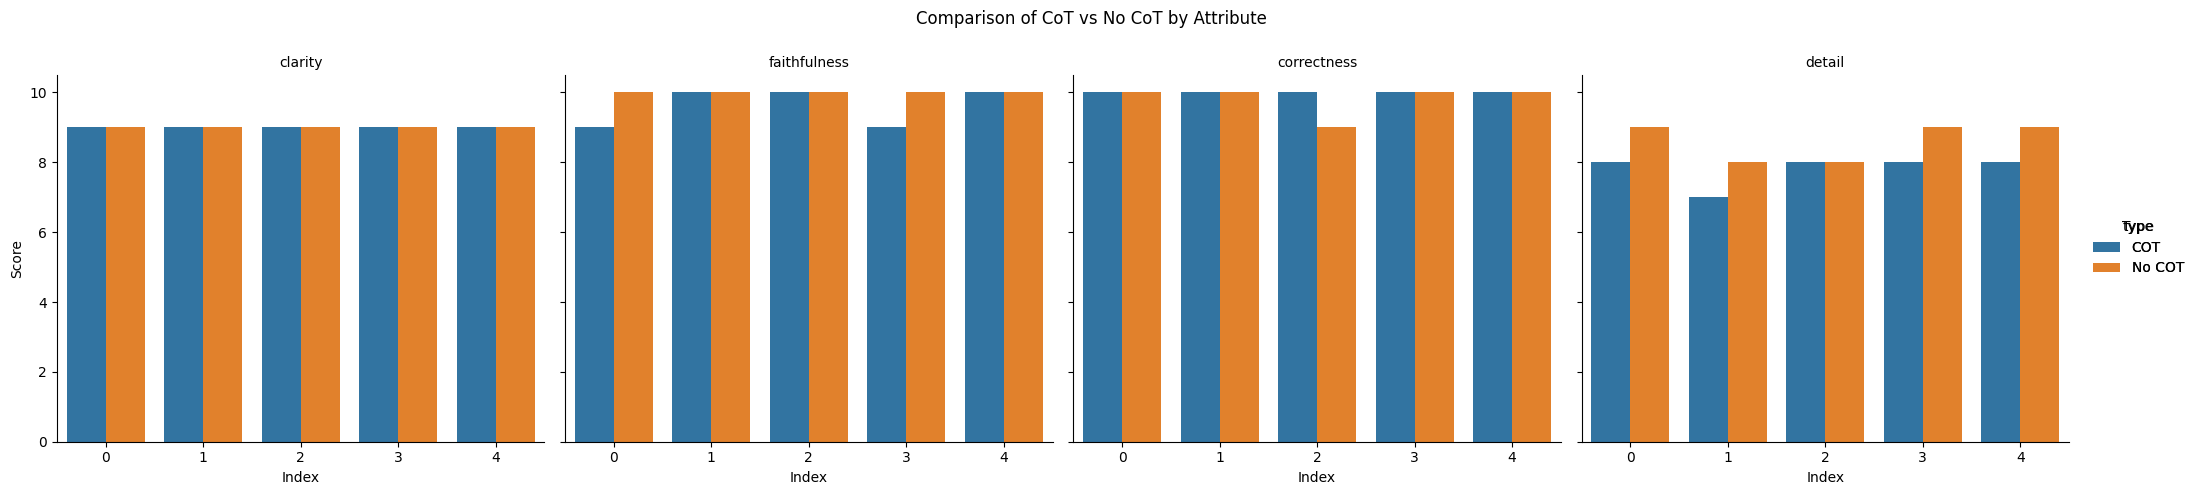

In [102]:
import seaborn as sns

# Reset the index to use 'type' and 'index' as columns
comparison_df_reset = comparison_df.reset_index()

# Melt the dataframe to long format for seaborn
melted_comparison_df = comparison_df_reset.melt(
    id_vars=["level_0", "level_1"], var_name="attribute", value_name="score"
)

# Rename columns for clarity
melted_comparison_df = melted_comparison_df.rename(
    columns={"level_0": "type", "level_1": "index"}
)

# Plot using seaborn with facets
g = sns.catplot(
    data=melted_comparison_df,
    x="index",
    y="score",
    hue="type",
    col="attribute",
    kind="bar",
    height=5,
    aspect=1,
)
g.set_titles("{col_name}")
g.set_axis_labels("Index", "Score")
g.add_legend(title="Type")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Comparison of CoT vs No CoT by Attribute")
plt.show()


#### ❓Question #1:

How did your prompting strategies change the evaluation scores? What does this tell you/what did you learn?

As can be seen above, adding the CoT portion has an impact on the `detail` metric. The above is a barebones implementation of an evaluation framework, and will break reguarly based on format changes. To make it robust, we should use Pydantic validation to ensure that the data sampled from the model is accessible for downstream processing.